In [ ]:
from google.colab import files
uploaded = files.upload()

Saving credit_card_fraud_100.csv to credit_card_fraud_100.csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier # import RandomForestClassifier

from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataset_path = list(uploaded.keys())[0]
df = pd.read_csv(dataset_path)

In [ ]:
df.columns = df.columns.str.strip()

In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)

In [ ]:
df = df.drop_duplicates()

In [ ]:
X = df.drop('Class', axis=1)
y=df['Class']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
sm = SMOTE(random_state=1)
X_res, y_res = sm.fit_resample(X_scaled, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1)

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [ ]:
lrf = RandomForestClassifier()
lrf.fit(X_train, y_train)
y_pred_rf = lrf.predict(X_test)

In [ ]:
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, lrf.predict_proba(X_test)[:, 1]))

# print("Logistic Regression:")
# print(classification_report(y_test, y_pred_lr))
# print("ROC-AUC Score:", roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

# print("\nRandom Forest:")
# print(classification_report(y_test, y_pred_rf))
# print("ROC-AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.59      0.69        17
           1       0.71      0.89      0.79        19

    accuracy                           0.75        36
   macro avg       0.77      0.74      0.74        36
weighted avg       0.77      0.75      0.74        36

ROC-AUC Score: 0.6873065015479876

Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        17
           1       0.94      0.89      0.92        19

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36

ROC-AUC Score: 0.9907120743034056


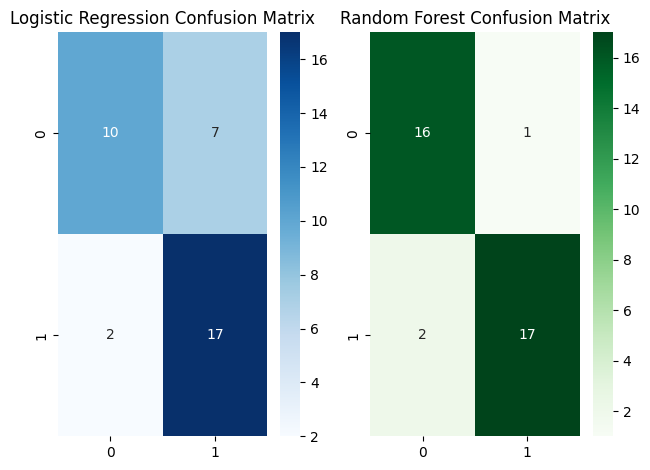

In [ ]:
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')

plt.tight_layout()

plt.show()
